In [2]:

!kaggle competitions download -c spaceship-titanic


  0%|          | 0.00/299k [00:00<?, ?B/s]
100%|██████████| 299k/299k [00:00<00:00, 743kB/s]
100%|██████████| 299k/299k [00:00<00:00, 739kB/s]


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")




In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Limpieza de datos

1-Distinguir volumnas categoricas de numericas
2-Tipos de datos
3-Valores nulos

In [6]:
# La columna Transported la dejamos como valor booleano
df['Transported']= df['Transported'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
print("Variables categoricas:")
variables_categoricas = df.select_dtypes(include =['object']).columns
for col in  variables_categoricas:
  print(col)

Variables categoricas:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [8]:
print("Variables numericas:")
variables_numericas = df._get_numeric_data().columns
for col in variables_numericas:
  print(col)

Variables numericas:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [9]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [10]:
# valores nulos
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Remplazamos valores nulos

1-Variables categoricas son remplazadas con la moda

2-Variables numericas son remplazadasd con el promedio

In [12]:
# Variables categoricas

for cat_col in variables_categoricas:
  df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

In [13]:
# variables numericas

for num_col in variables_numericas:
  df[num_col] = df[num_col].fillna(df[num_col].mean())

In [15]:
# Se han eliminado valores nulos
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

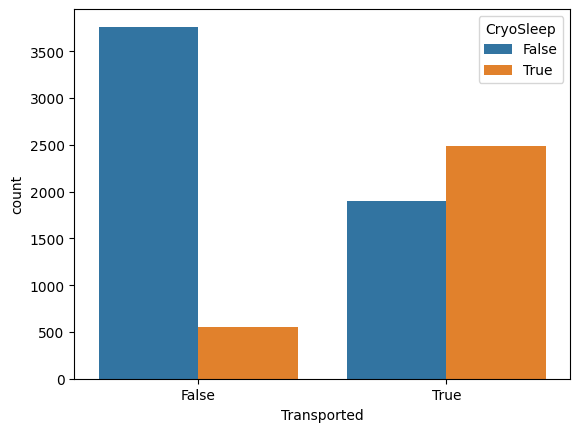

In [16]:
# Se aprecia relacion entre estado de Criogenesis y posibilidad de ser transportado
import seaborn as sb
sb.countplot(x="Transported", data= df, hue="CryoSleep")

In [17]:
# se separan los datos de columna 'Cabin'

cabin_split = df['Cabin'].str.split('/', expand=True)
cabin_split.columns = ["Deck", "Room_Number", "Side"]
new_df = pd.concat([df, cabin_split], axis=1)
new_df = new_df.drop(['Cabin'], axis=1)
new_df.head()



,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [18]:
new_df = new_df.drop(['PassengerId', 'Destination', 'Name'], axis=1)
new_df.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Room_Number,Side
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [19]:
home_dummies = pd.get_dummies(new_df['HomePlanet'])

In [20]:
new_df = pd.concat([new_df,home_dummies], axis=1)


In [21]:
deck_dummies = pd.get_dummies(new_df['Deck'])
side_dummies = pd.get_dummies(new_df['Side'])

final_df = new_df.drop(['Deck','Side'], axis=1)

final_df = pd.concat([final_df,deck_dummies,side_dummies], axis=1)

final_df.head()


,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,A,B,C,D,E,F,G,T,P,S
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,False,True,False,False,False,False,False,False,True,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,False,False,False,False,False,True,False,False,False,True
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,True,False,False,False,False,False,False,False,False,True
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,True,False,False,False,False,False,False,False,False,True
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,False,False,False,False,False,True,False,False,False,True


In [22]:
final_df = final_df.rename(columns={"A": "Deck_A", "B": "Deck_B", "C":"Deck_C", "D":"Deck_D","E":"Deck_E","F":"Deck_F","G":"Deck_G","T":"Deck_T","P":"Side_P","S":"Side_S"})

In [23]:
 final_df.drop(['Side_S'], axis=1, inplace=True)

In [24]:
final_df.drop(['HomePlanet'], axis=1, inplace = True)

<Axes: >

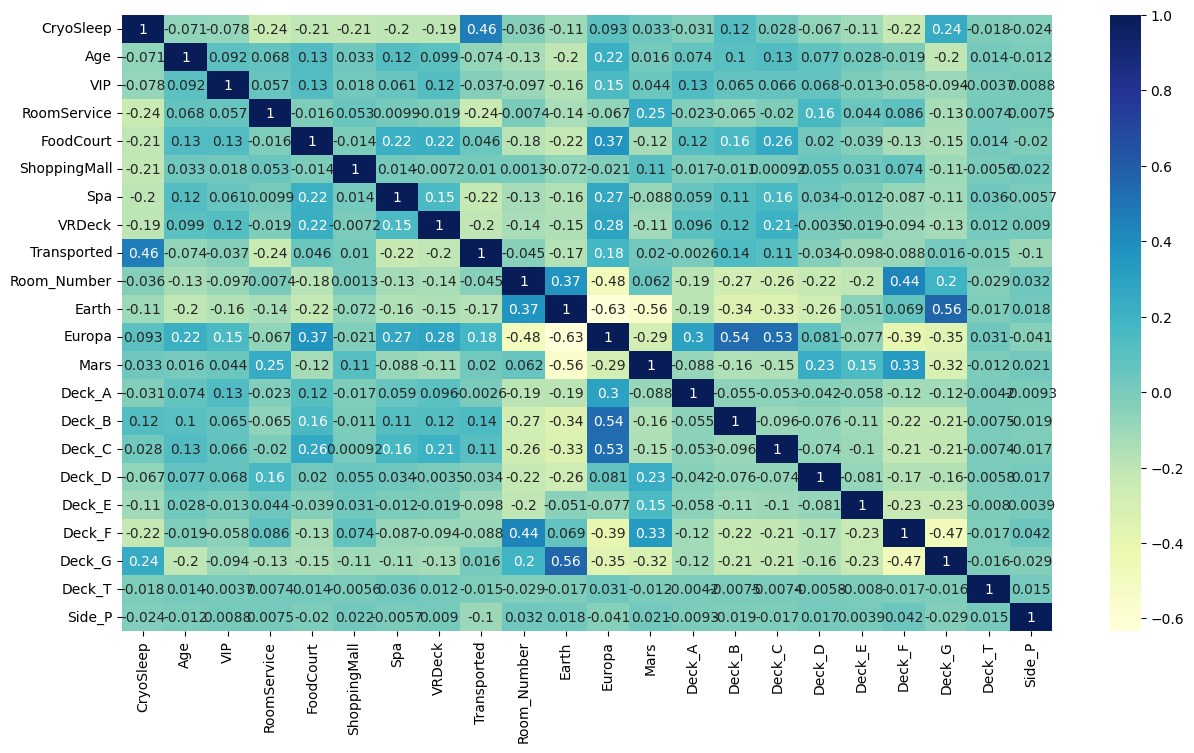

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
sb.heatmap(final_df.corr(), annot=True, cmap="YlGnBu")

In [26]:
final_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Room_Number,...,Mars,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,False,False,True,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,...,False,False,False,False,False,False,True,False,False,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,...,False,True,False,False,False,False,False,False,False,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,...,False,True,False,False,False,False,False,False,False,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,...,False,False,False,False,False,False,True,False,False,False


In [27]:
# Separamos sets  X e Y


# especificamos y
y= final_df['Transported']

# Especificamos X
X = final_df.drop(['Transported'], axis=1)




In [28]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Room_Number,Earth,...,Mars,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,False,...,False,False,True,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,True,...,False,False,False,False,False,False,True,False,False,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,False,...,False,True,False,False,False,False,False,False,False,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,False,...,False,True,False,False,False,False,False,False,False,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,98,False,...,False,True,False,False,False,False,False,False,False,True
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,1499,True,...,False,False,False,False,False,False,False,True,False,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1500,True,...,False,False,False,False,False,False,False,True,False,False
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,608,False,...,False,False,False,False,False,True,False,False,False,False


In [29]:
# Dividimos datos en entrenamiento y prueba 
# Usamos 20% de los datos para pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [30]:
X_train.isna().sum()

CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Room_Number     0
Earth           0
Europa          0
Mars            0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
Side_P          0
dtype: int64

In [31]:
# Escalamos datos X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.fit_transform(X_test)


In [32]:
# Entrenamos el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_esc, y_train)



LogisticRegression()

In [34]:
# Generamos predicciones con Regresion logistica
predictions = model.predict(X_test_esc)

In [35]:
# Medimos exactitud del modelo
from sklearn.metrics import accuracy_score

accuracy_modelo = accuracy_score(y_test, predictions)


print(f"{accuracy_modelo}")


0.7832087406555491


Tenemos un 79% de precision en nuestra prediccion en modelo1
Tenemos un 75% de precision en nuestra prediccion en modelo2

In [ ]:
# vemos mas metricas
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79       875
        True       0.78      0.81      0.79       864

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [ ]:
# veamos una matriz de confusion para ver cuantas veces acertamos con modelo de variables totales
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predictions), columns= ["Pred: No", "Pred: Si"], index= ["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,661,208
Real: Si,151,719


In [ ]:
# se guarda modelo de variables totales
import pickle

In [ ]:
pickle.dump(model, open('./model_saved','wb'))